In [3]:
import pandas as pd
data=pd.read_excel("data_dictionary_Real_estate.xlsx")
data.head()

,Unnamed: 0,Unnamed: 1
0,Variable,Description
1,UID,The ID of the location of which you are analyz...
2,BLOCKID,Block ID of tract. If there is no specified bl...
3,COUNTYID,The County Code reported by the U.S. Census Bu...
4,STATEID,The state code reported by the U.S. Census Bur...


In [4]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 1'], dtype='object')

In [5]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print("Train Data Sample:")
print(train_data.head())

print("\nTest Data Sample:")
print(test_data.head())

Train Data Sample:
      UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type  ... female_age_mean  female_age_median  \
0    Hamilton        Hamilton   City  ...        44.48629           45.33333   
1  South Bend        Roseland   City  ...        36.48391           37.58333   
2    Danville        Danville   City  ...        42.15810           42.83333   
3    San Juan        Guaynabo  Urban  ...        47.77526           50.58333   
4   Manhattan  Manhattan City   City  ...        24.17693           21.58333   

   female_age_stdev  female_age_sample_weight  female_age_sam

In [6]:
print(train_data.columns)
print(test_data.columns)

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [7]:
train_duplicates = train_data['BLOCKID'].duplicated().any()
if not train_duplicates:
    print("The 'BLOCKID' column in the train dataset is unique and can be a primary key.")
else:
    print("The 'BLOCKID' column in the train dataset is not unique and cannot be a primary key.")

test_duplicates = test_data['BLOCKID'].duplicated().any()
if not test_duplicates:
    print("The 'BLOCKID' column in the test dataset is unique and can be a primary key.")
else:
    print("The 'BLOCKID' column in the test dataset is not unique and cannot be a primary key.")


The 'BLOCKID' column in the train dataset is not unique and cannot be a primary key.
The 'BLOCKID' column in the test dataset is not unique and cannot be a primary key.


In [8]:
test_duplicates = test_data['UID'].duplicated().any()
if not test_duplicates:
    print("The 'UID' column in the test dataset is unique and can be a primary key.")
else:
    print("The 'UID' column in the test dataset is not unique and cannot be a primary key.")


The 'UID' column in the test dataset is not unique and cannot be a primary key.


In [9]:
data.columns[data.nunique() == 1]

Index([], dtype='object')

In [10]:
fill_rate = data.count() / len(data) * 100
fill_rate

Unnamed: 0    100.0
Unnamed: 1    100.0
dtype: float64

In [11]:
import folium

In [12]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [13]:
combined_df.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [14]:
combined_df.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [15]:
filtered_data = combined_df[(combined_df['home_equity_second_mortgage'] == 1) | (combined_df['second_mortgage'] == 1)]


In [16]:
filtered_data = filtered_data[filtered_data['pct_own'] > 10]


In [17]:
sorted_data = filtered_data.sort_values(by='second_mortgage_cdf', ascending=False)


In [18]:
top_locations = sorted_data.head(2500)


In [19]:
import folium

# Create a map centered on New York City
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Add markers for the top locations
for index, row in top_locations.iterrows():
    folium.Marker([row['lat'], row['lng']], 
                  popup=f"Second Mortgage Presence: Yes, Ownership: {row['pct_own']}%"
                 ).add_to(m)

# Display the map
m.save('debt_analysis_map.html')  # Save the map to an HTML file


In [20]:
import matplotlib.pyplot as plt

In [21]:
df=combined_df

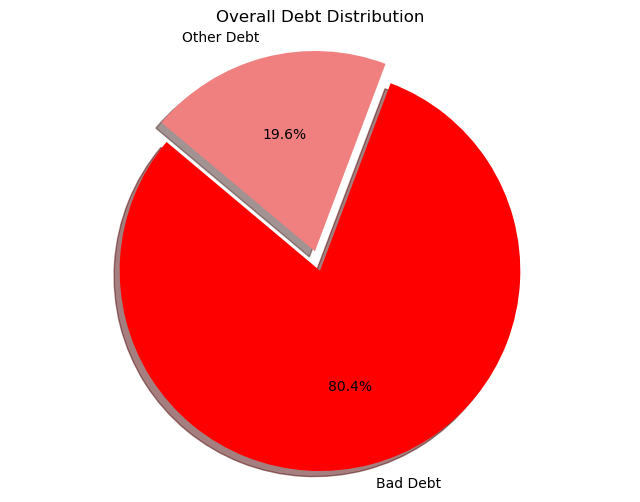

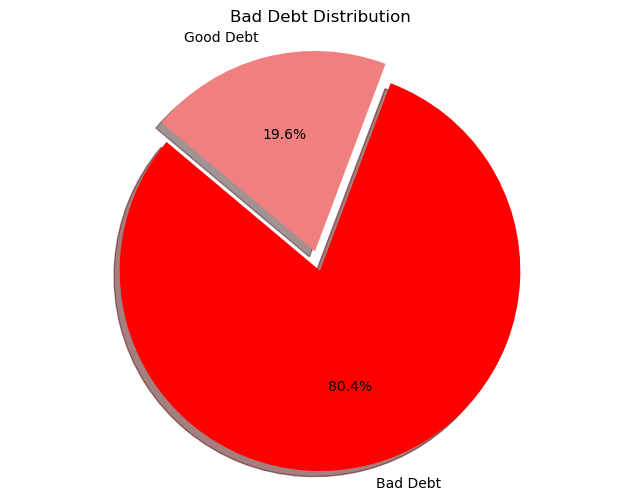

In [22]:
# Calculate bad debt based on the provided equation
df['bad_debt'] = df['second_mortgage'] + df['home_equity'] - df['home_equity_second_mortgage']

# Calculate overall debt as the sum of second mortgage and home equity
df['overall_debt'] = df['second_mortgage'] + df['home_equity']

# Calculate total bad debt and total overall debt
total_bad_debt = df['bad_debt'].sum()
total_overall_debt = df['overall_debt'].sum()

# Create a pie chart for overall debt
labels = ['Bad Debt', 'Other Debt']
sizes = [total_bad_debt, total_overall_debt - total_bad_debt]
colors = ['red', 'lightcoral']
explode = (0.1, 0)  # Explode the "Bad Debt" slice for emphasis

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Overall Debt Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Create a pie chart for bad debt
labels = ['Bad Debt', 'Good Debt']
sizes = [total_bad_debt, total_overall_debt - total_bad_debt]
colors = ['red', 'lightcoral']
explode = (0.1, 0)  # Explode the "Bad Debt" slice for emphasis

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Bad Debt Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


In [23]:
# Check if the columns are present in the DataFrame
print('Columns present in the DataFrame:')
print(df.columns)

# Display the first few rows of the DataFrame to verify the new columns
print('\nFirst few rows of the DataFrame:')
print(df.head())


Columns present in the DataFrame:
Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf'

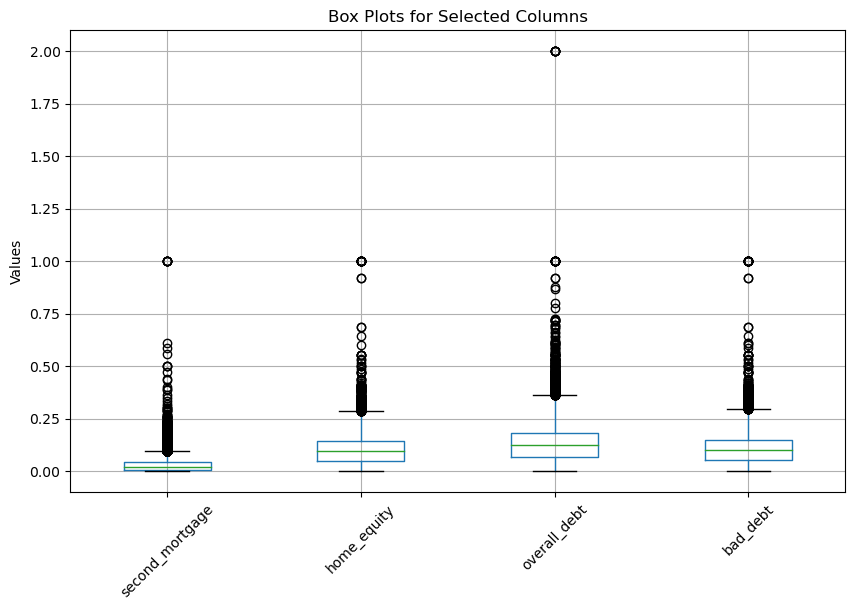

In [24]:
import matplotlib.pyplot as plt
columns_to_plot = ['second_mortgage', 'home_equity', 'overall_debt', 'bad_debt']
# Create a box plot for each selected column
plt.figure(figsize=(10, 6))
df[columns_to_plot].boxplot()
plt.title('Box Plots for Selected Columns')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.show()


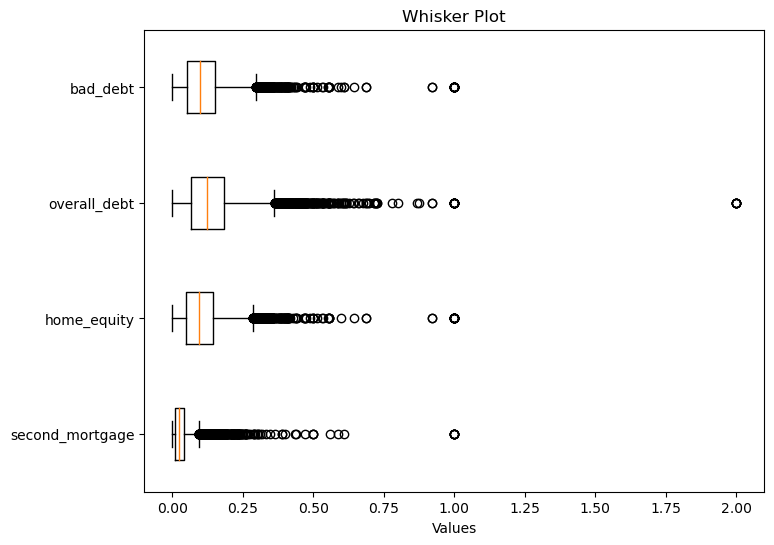

In [25]:
columns_to_plot = ['second_mortgage', 'home_equity', 'overall_debt', 'bad_debt']

# Create a whisker plot for the selected columns
plt.figure(figsize=(8, 6))
plt.boxplot([df[col].dropna() for col in columns_to_plot], labels=columns_to_plot, vert=False, showfliers=True, whis=1.5)
plt.title('Whisker Plot')
plt.xlabel('Values')
plt.show()


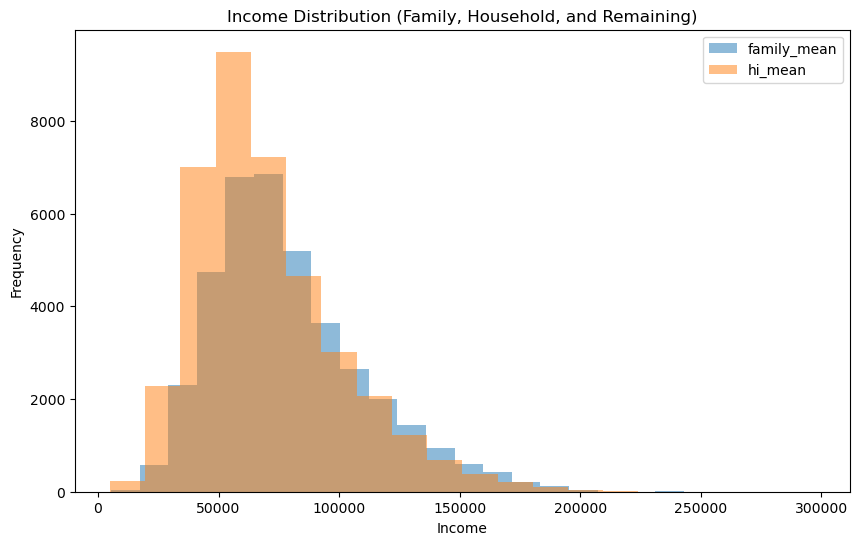

In [26]:
# Select the columns for income distribution
columns_to_plot = ['family_mean', 'hi_mean']

# Calculate remaining income as the difference between family income and household income
df['remaining_income'] = df['family_mean'] - df['hi_mean']

# Create a histogram for the selected columns
plt.figure(figsize=(10, 6))

# Plot the histograms for family income, household income, and remaining income
for col in columns_to_plot:
    plt.hist(df[col].dropna(), bins=20, alpha=0.5, label=col)

# Customize the plot
plt.title('Income Distribution (Family, Household, and Remaining)')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

In [27]:
# Calculate population density
df['population_density'] = df['pop'] / df['ALand']
# Calculate median age
df['median_age'] = (df['male_age_median'] * df['male_pop'] + df['female_age_median'] * df['female_pop']) / (df['male_pop'] + df['female_pop'])


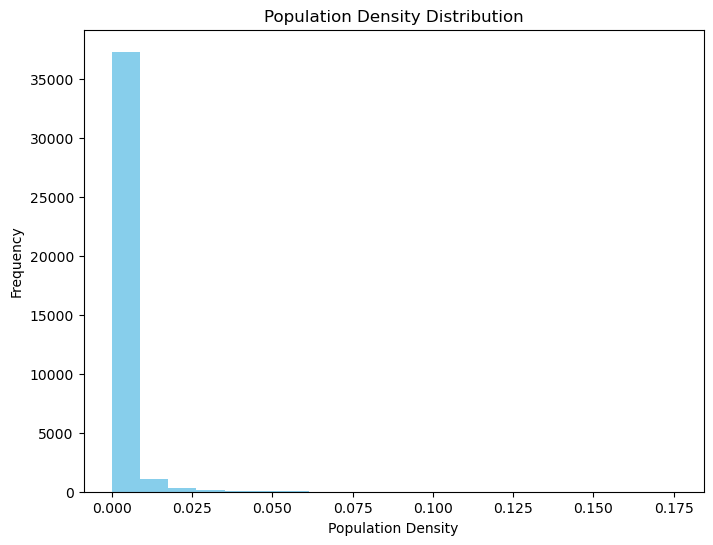

In [28]:
# Create a histogram for population density
plt.figure(figsize=(8, 6))
plt.hist(df['population_density'].dropna(), bins=20, color='skyblue')
plt.title('Population Density Distribution')
plt.xlabel('Population Density')
plt.ylabel('Frequency')
plt.show()

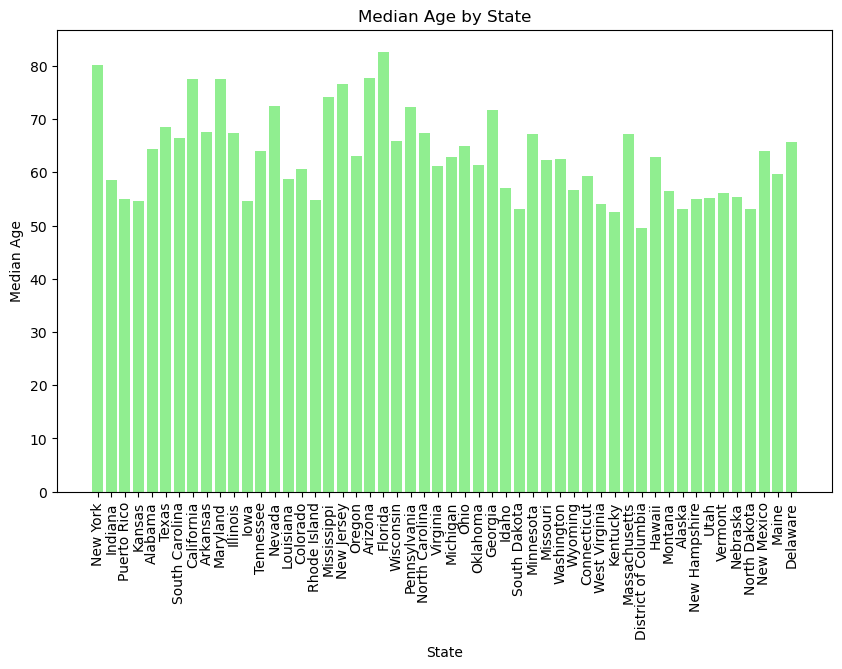

In [29]:
# Create a bar chart for median age
plt.figure(figsize=(10, 6))
plt.bar(df['state'], df['median_age'], color='lightgreen')
plt.title('Median Age by State')
plt.xlabel('State')
plt.ylabel('Median Age')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

In [30]:
# Define the bin edges and labels
bin_edges = [0, 50000, 100000, 150000, 200000, float('inf')]
bin_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']

# Create a new column 'population_bin' with the population bins
df['population_bin'] = pd.cut(df['pop'], bins=bin_edges, labels=bin_labels)

# Group the DataFrame by 'population_bin' and calculate the average values for 'married', 'separated', and 'divorced'
population_stats = df.groupby('population_bin')[['married', 'separated', 'divorced']].mean().reset_index()


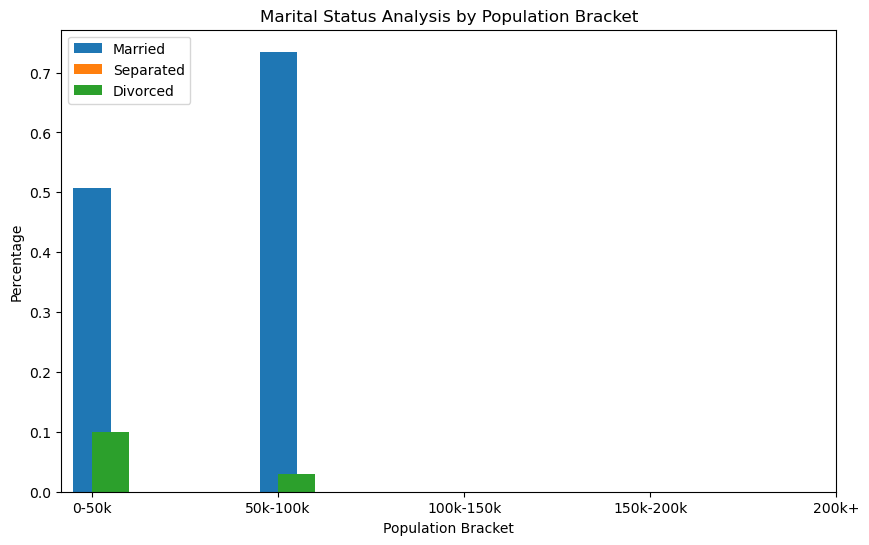

In [31]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot a grouped bar chart
width = 0.2
x = range(len(population_stats))
plt.bar(x, population_stats['married'], width, label='Married', align='center')
plt.bar(x, population_stats['separated'], width, label='Separated', align='edge')
plt.bar(x, population_stats['divorced'], width, label='Divorced', align='edge')

# Customize the plot
plt.title('Marital Status Analysis by Population Bracket')
plt.xlabel('Population Bracket')
plt.ylabel('Percentage')
plt.xticks(x, population_stats['population_bin'])
plt.legend()
plt.show()


In [32]:
# Calculate average rent as a percentage of income at the overall level
overall_avg_rent_percentage = (df['rent_mean'] / df['hi_mean']).mean()
print(f"Overall Average Rent as a Percentage of Income: {overall_avg_rent_percentage:.2%}")


Overall Average Rent as a Percentage of Income: 1.59%


In [33]:
# Calculate average rent as a percentage of income for different states
state_avg_rent_percentage = df.groupby('state_ab')[['rent_mean', 'hi_mean']].mean()
state_avg_rent_percentage['rent_as_percentage_of_income'] = (state_avg_rent_percentage['rent_mean'] / state_avg_rent_percentage['hi_mean']) * 100
state_avg_rent_percentage = state_avg_rent_percentage.sort_values(by='rent_as_percentage_of_income', ascending=False)
print(state_avg_rent_percentage[['rent_as_percentage_of_income']])


          rent_as_percentage_of_income
state_ab                              
HI                            1.990611
PR                            1.805874
FL                            1.791096
CA                            1.790484
NV                            1.680039
AZ                            1.633702
DC                            1.609649
NY                            1.603105
VA                            1.523755
OR                            1.520818
NJ                            1.519060
MD                            1.518589
CO                            1.513370
WA                            1.483753
GA                            1.483591
DE                            1.482469
SC                            1.461961
MI                            1.451087
MS                            1.450478
NM                            1.426954
TX                            1.425701
AK                            1.424557
IL                            1.419376
UT                       

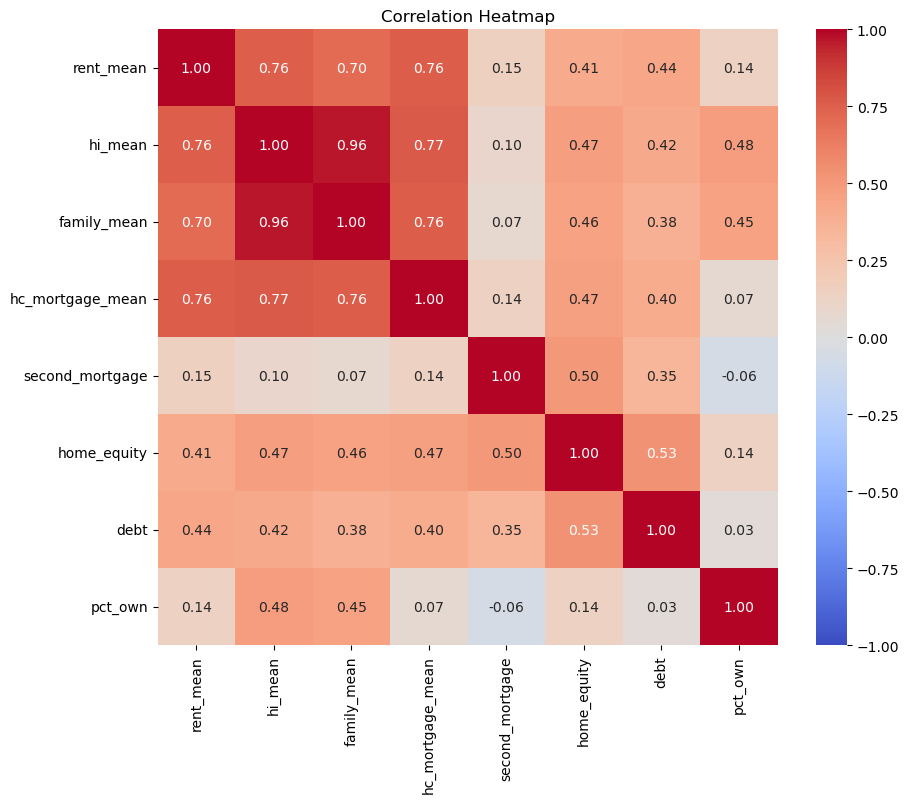

In [34]:
# Select relevant variables for correlation analysis
correlation_variables = ['rent_mean', 'hi_mean', 'family_mean', 'hc_mortgage_mean', 'second_mortgage', 'home_equity', 'debt', 'pct_own']

# Calculate the correlation matrix
correlation_matrix = df[correlation_variables].corr()

import seaborn as sns 
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [35]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find highly correlated variable pairs
threshold = 0.7  # You can adjust the threshold as needed
highly_correlated_pairs = []

# Iterate through the correlation matrix to find highly correlated pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            highly_correlated_pairs.append(pair)

# Print highly correlated variable pairs
for pair in highly_correlated_pairs:
    print(f"Highly correlated variables: {pair[0]} and {pair[1]} (Correlation: {pair[2]:.2f})")


C:\Users\sudar\AppData\Local\Temp\ipykernel_11648\3382186187.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Highly correlated variables: STATEID and UID (Correlation: 0.98)
Highly correlated variables: lng and zip_code (Correlation: -0.93)
Highly correlated variables: male_pop and pop (Correlation: 0.98)
Highly correlated variables: female_pop and pop (Correlation: 0.98)
Highly correlated variables: female_pop and male_pop (Correlation: 0.91)
Highly correlated variables: rent_median and rent_mean (Correlation: 0.98)
Highly correlated variables: rent_samples and rent_sample_weight (Correlation: 0.80)
Highly correlated variables: rent_gt_20 and rent_gt_15 (Correlation: 0.75)
Highly correlated variables: rent_gt_25 and rent_gt_20 (Correlation: 0.82)
Highly correlated variables: rent_gt_30 and rent_gt_20 (Correlation: 0.71)
Highly correlated variables: rent_gt_30 and rent_gt_25 (Correlation: 0.86)
Highly correlated variables: rent_gt_35 and rent_gt_25 (Correlation: 0.77)
Highly correlated variables: rent_gt_35 and rent_gt_30 (Correlation: 0.90)
Highly correlated variables: rent_gt_40 and rent_gt

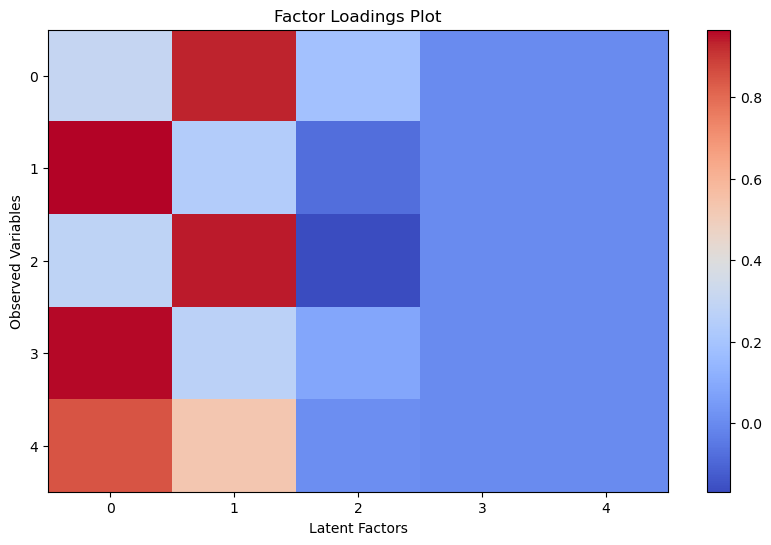

In [36]:
from factor_analyzer import FactorAnalyzer

# Select the relevant observed variables for Factor Analysis
observed_variables = ['second_mortgage', 'home_equity','home_equity_second_mortgage','bad_debt','overall_debt']  # Replace with your observed variables

# Create a FactorAnalyzer object and specify the number of factors to extract
n_factors = 5  # Number of factors to extract
fa = FactorAnalyzer(n_factors, rotation='varimax')  # You can choose a rotation method (e.g., 'varimax', 'promax', etc.)

# Fit the Factor Analyzer model to your data
fa.fit(df[observed_variables])

# Get the factor loadings
factor_loadings = fa.loadings_

# Plot the factor loadings
plt.figure(figsize=(10, 6))
plt.imshow(factor_loadings, cmap='coolwarm', aspect='auto', interpolation='none')
plt.colorbar()
plt.title('Factor Loadings Plot')
plt.xlabel('Latent Factors')
plt.ylabel('Observed Variables')
plt.show()

In [37]:
df.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '